# Using `llama.cpp` vision to analyze single-cell images

This notebook demonstrates how to use `llama.cpp` to analyze single-cell images.
Note: this work assumes the data have been downloaded locally using
`src/data/prepare_files.py`.

In [1]:
import pathlib

import matplotlib.pyplot as plt
from skimage import io
from utils import display_response, query_llama_with_image_path

# setup a data directory reference
source_data_dir = str(pathlib.Path("../data/input").resolve())
target_data_dir = str(pathlib.Path("../data/output").resolve())

In [2]:
# show the files
print(
    "List of files:\n",
    (file_list := list(pathlib.Path(source_data_dir).rglob("*.tif"))),
)

List of files:
 [PosixPath('/Users/buntend/Documents/work/scllama/src/data/input/B1_01_2_2_GFP_001.tif'), PosixPath('/Users/buntend/Documents/work/scllama/src/data/input/B1_01_2_1_GFP_001.tif')]


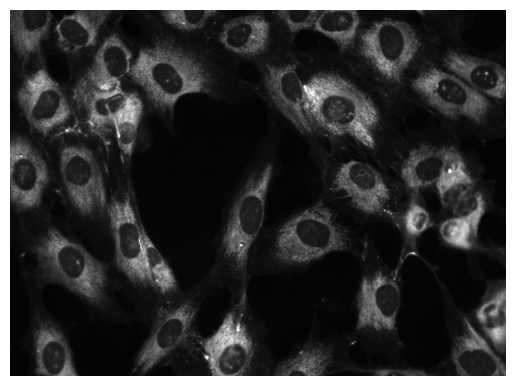

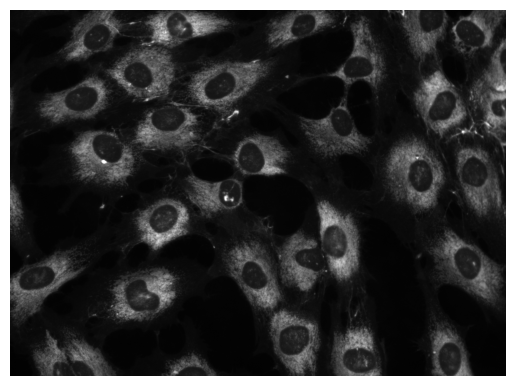

In [3]:
# display images by reading them locally
for image_file in pathlib.Path(source_data_dir).rglob("*.tif"):
    plt.clf()
    plt.imshow(io.imread(image_file), cmap="gray")
    plt.axis("off")
    plt.show()

In [4]:
# read an image into the model and ask it to describe
response = query_llama_with_image_path(
    image_path=str(file_list[0].resolve()), prompt="Describe this image."
)
# display the response as HTML rendered from markdown
display_response(response)

In [5]:
# read an image into the model and ask it to describe
response = query_llama_with_image_path(
    image_path=str(file_list[0].resolve()),
    # we might expect around 30 as a response
    prompt=(
        "How many objects are there in this image?"
        " Specifically, I'm looking for a count with"
        " a description of how/why and not code."
    ),
)
display_response(response)

In [6]:
# read an image into the model and ask it to describe
response = query_llama_with_image_path(
    image_path=str(file_list[0].resolve()),
    prompt=(
        "What is the image quality for this image"
        "(i.e. does it have good or bad quality for"
        "the domain you mentioned)?"
    ),
)
display_response(response)

In [7]:
# ask for features
response = query_llama_with_image_path(
    image_path=str(file_list[0].resolve()),
    prompt=(
        "Could you create me some CellProfiler features"
        " based on this image? I need to use the features"
        " to analyze the objects within from an image-based"
        " profiling perspective. I'm looking for a description"
        " of how/why and also the data itself."
    ),
)
display_response(response)